# requirement library 

In [77]:
!pip install mlxtend

In [78]:
!pip install catboost

In [79]:
!pip install lightgbm

In [80]:
!pip install xgboost

In [81]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [82]:
df = pd.read_csv(r"C:/Users/bazzi/Downloads/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [83]:
df.shape

(2000, 21)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [85]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [87]:
corr = df.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

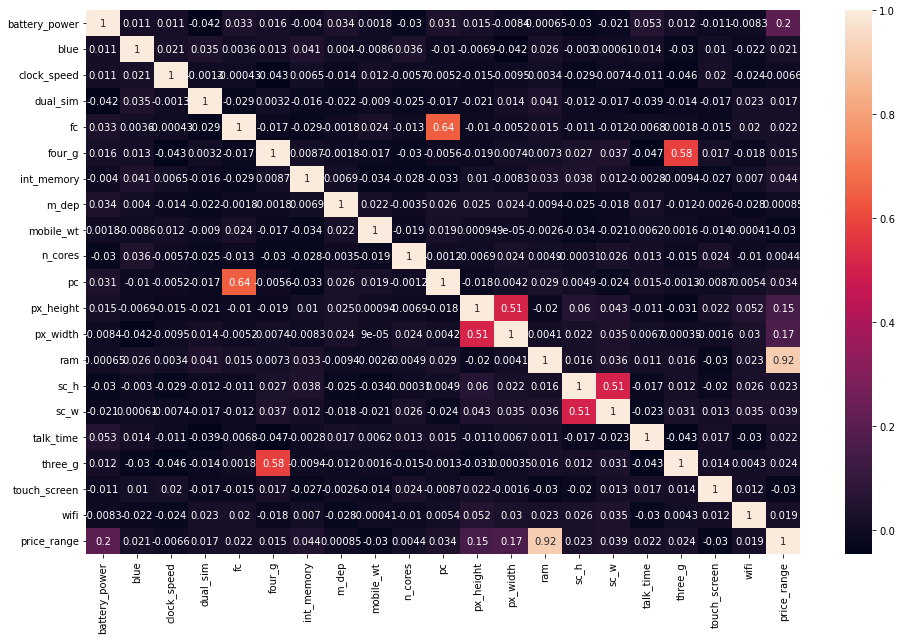

In [88]:
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True)

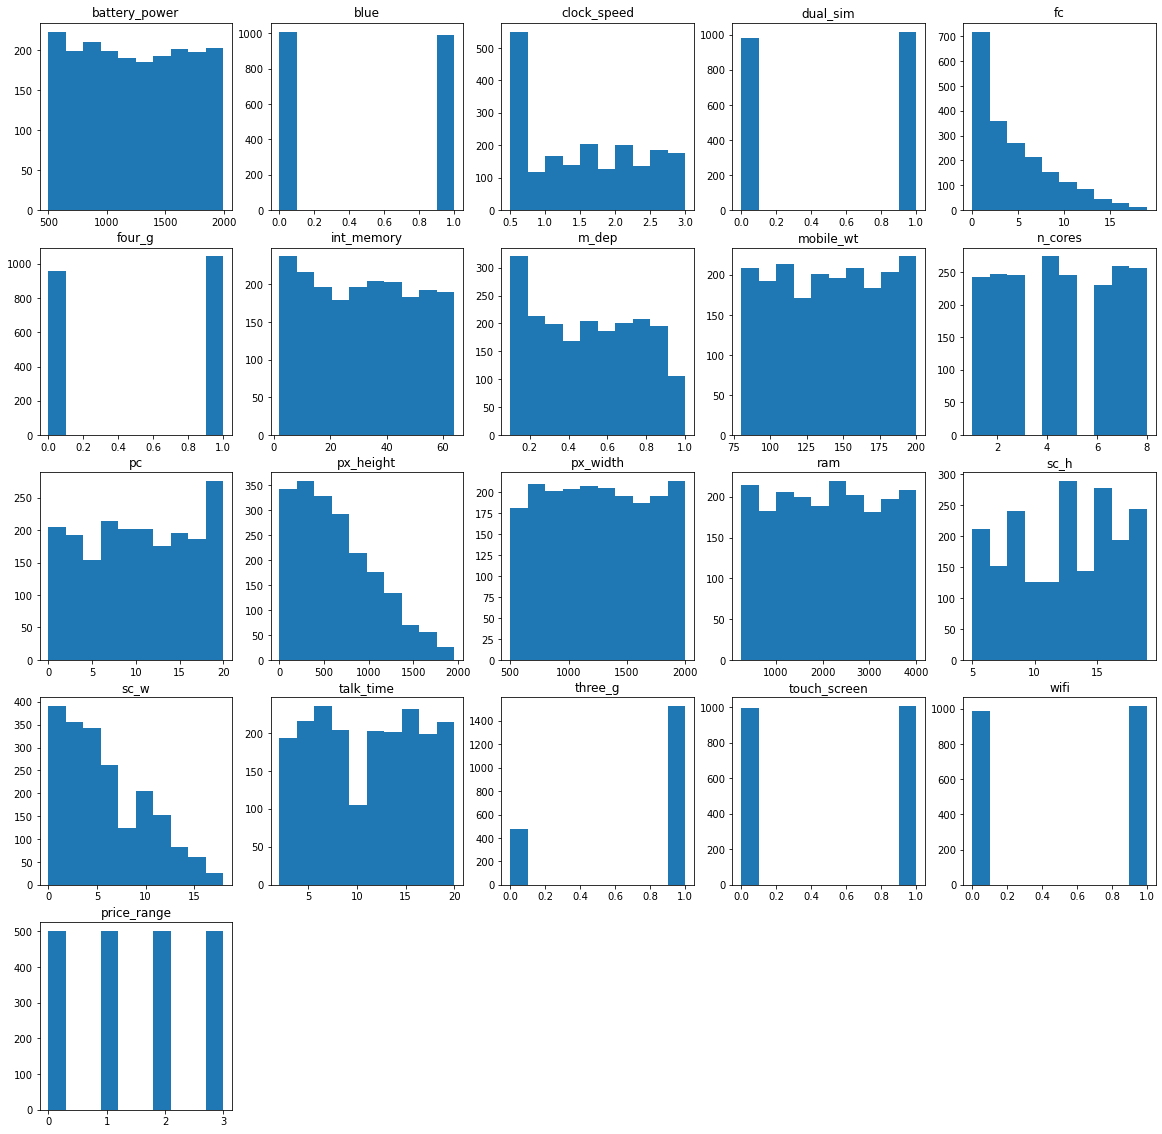

In [89]:
#plot histrogram
plt.figure(figsize=(20,20))
j = 1
for i in df.columns:
    plt.subplot(5,5,j)
    plt.title(f'{i}')
    plt.hist(df[i])
    j += 1
plt.show()

<AxesSubplot:>

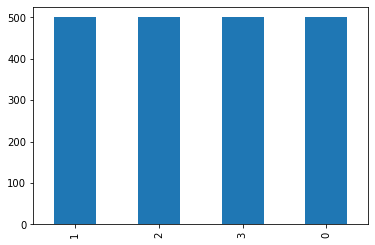

In [90]:
#check imbalanced data
df['price_range'].value_counts().plot(kind='bar')

In [91]:
cat_feature = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
con_feature = [col for col in df.columns if col not in cat_feature]

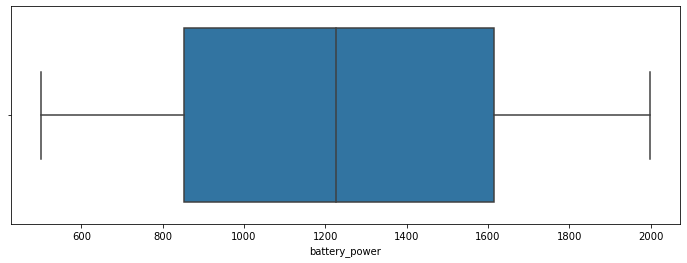

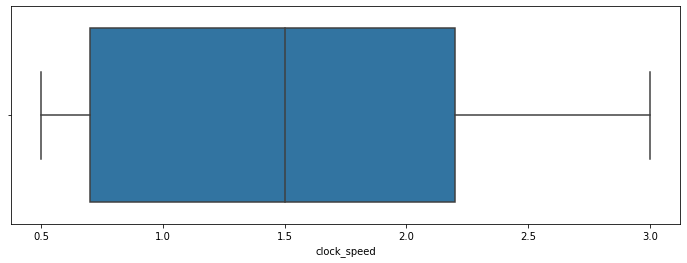

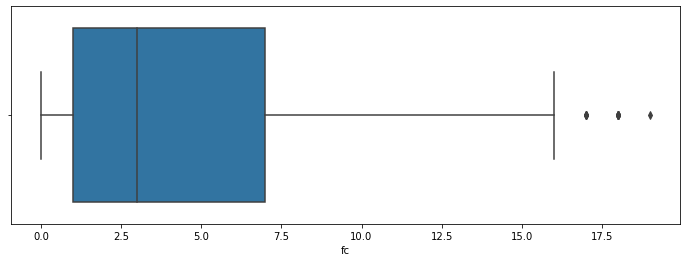

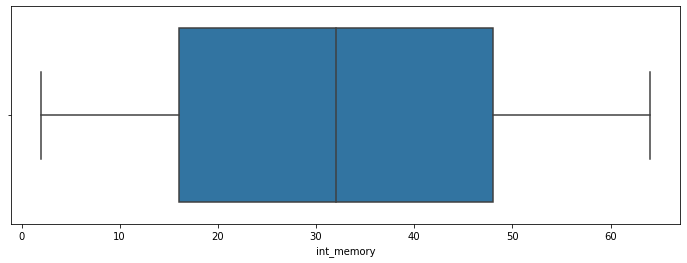

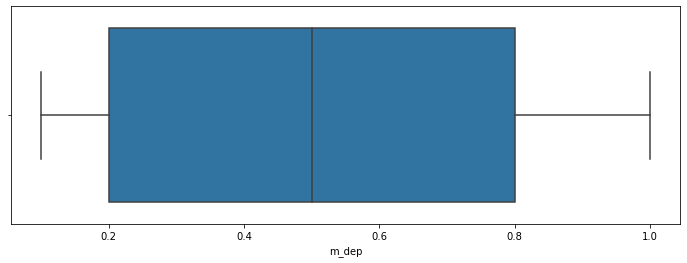

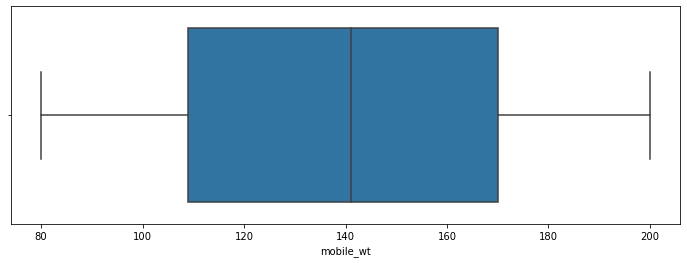

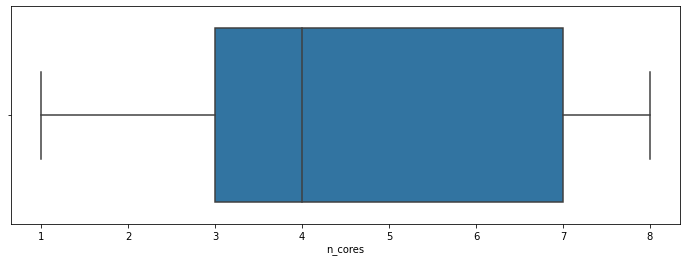

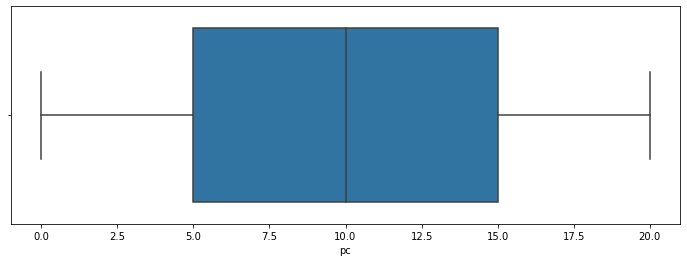

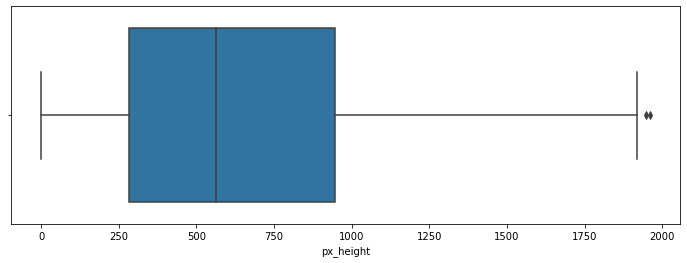

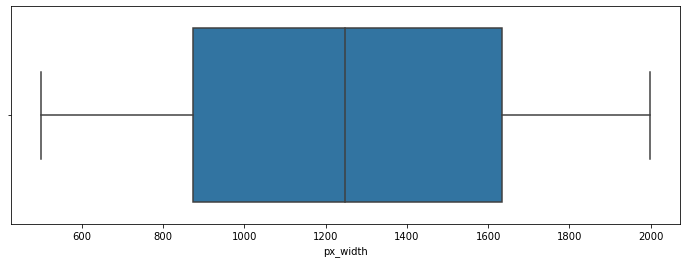

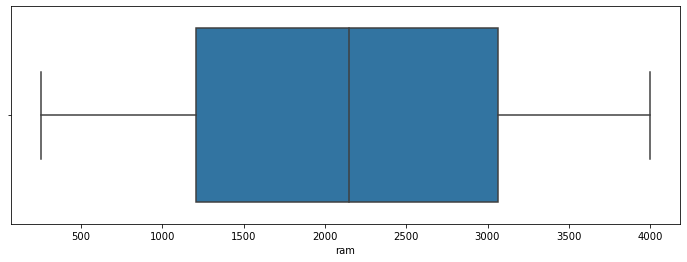

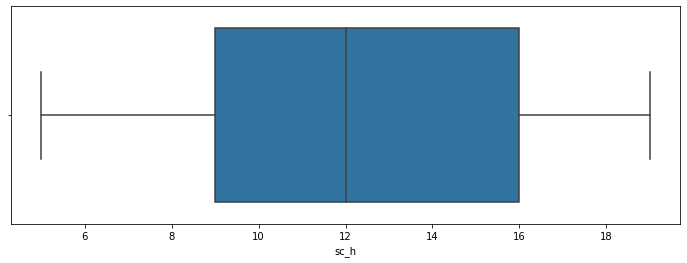

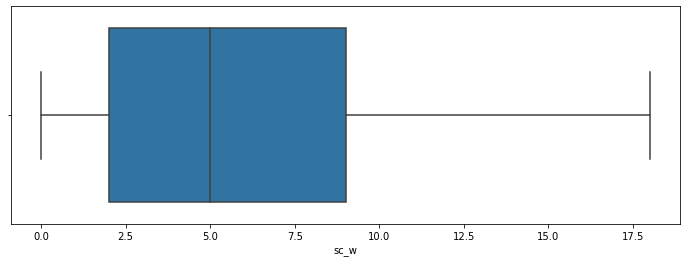

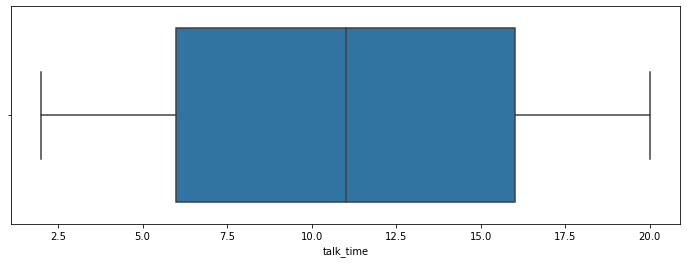

In [92]:
#check outlier in continous feature
for col in df[con_feature]:
    plt.figure(figsize = (12, 4))
    sns.boxplot(x=col, data= df[con_feature])
    plt.show()

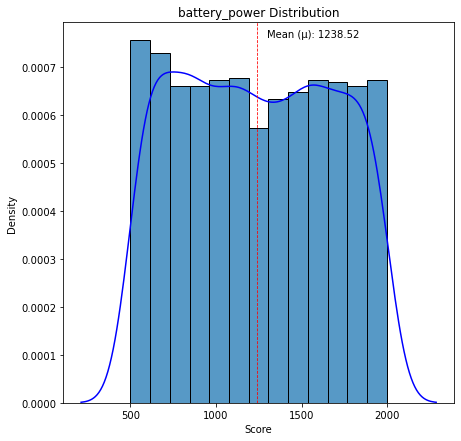

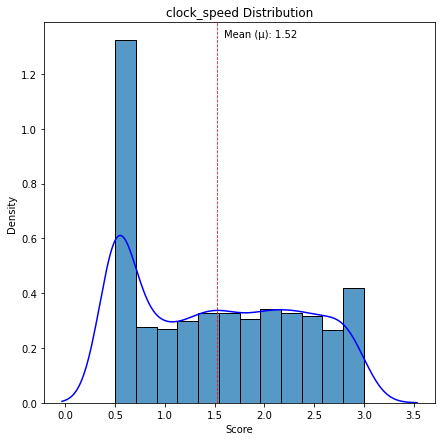

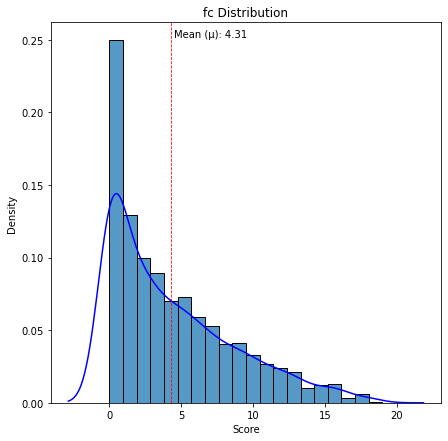

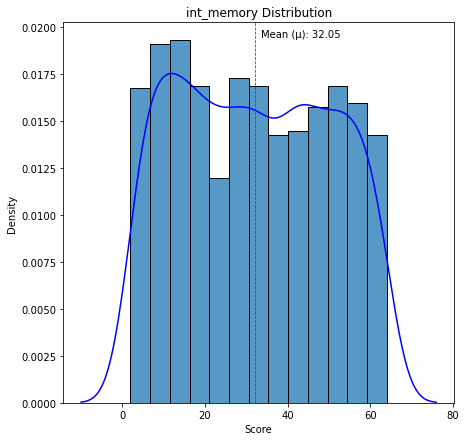

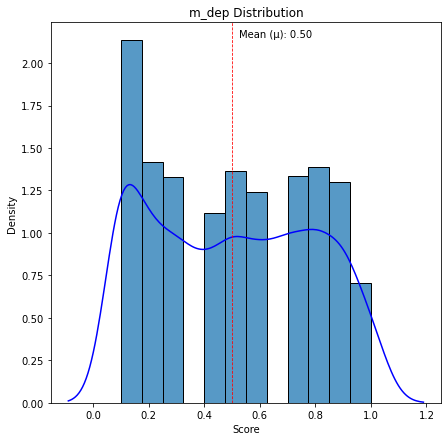

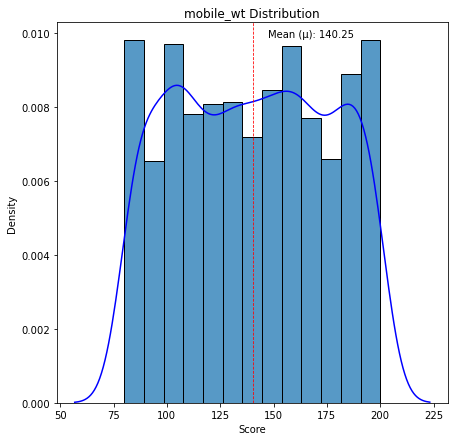

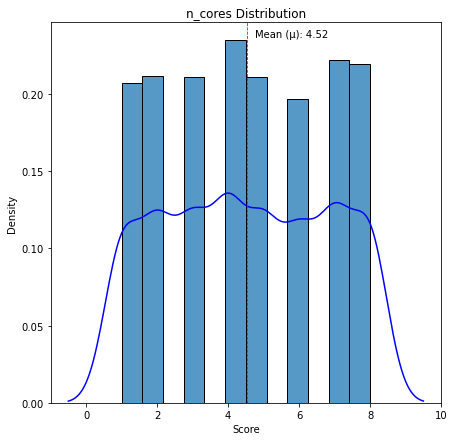

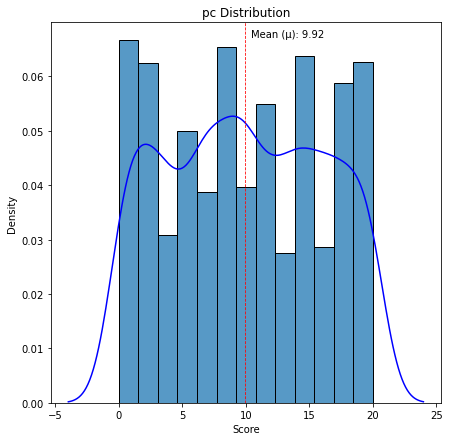

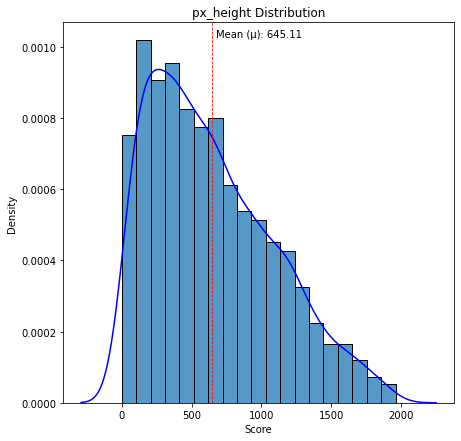

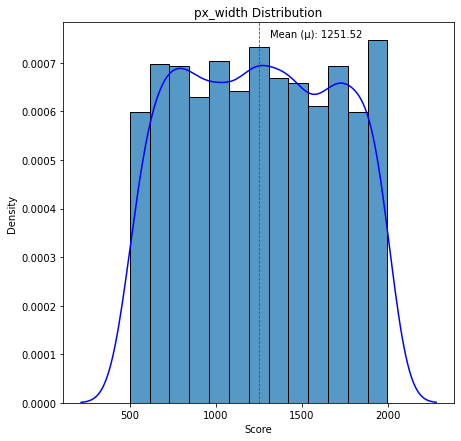

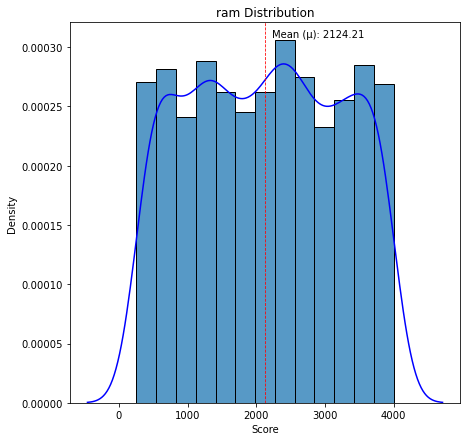

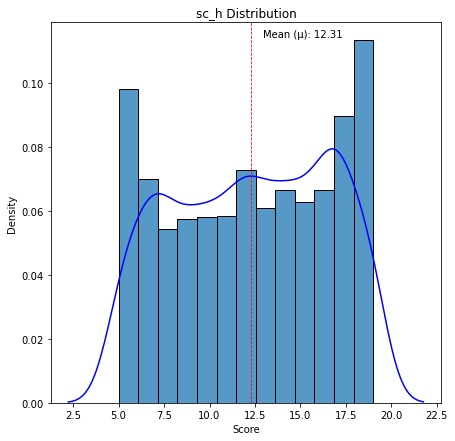

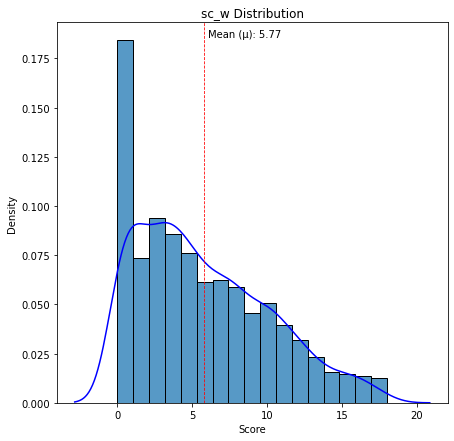

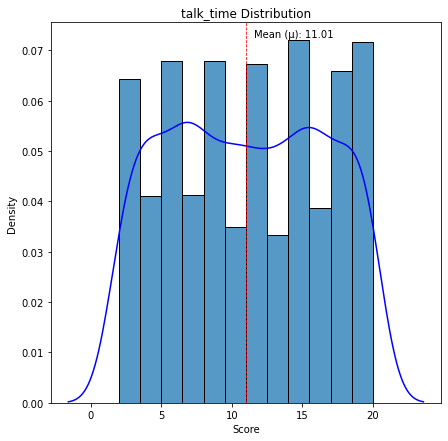

In [93]:
for col in df[con_feature]:
  plt.figure(figsize=(7, 7))
  plt.title("{col} Distribution".format(col = col))
  sns.histplot(df[col], stat='density')
  sns.kdeplot(df[col], color='blue')
  plt.axvline(df[col].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[col].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[col].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()
    

In [94]:
X = df.drop(['price_range'], axis=1)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [95]:
y = df['price_range']
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

# Feature Selection

In [97]:
#pip install mlxtend

## Wrapping method (using forward)

In [98]:
# wrapping method
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

sfs = SFS(DTC,
               k_features=12,
               forward = True,
               floating = False,
               verbose = 2,
               cv=5,
               scoring='accuracy',
               n_jobs=-1)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    2.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.5s finished

[2022-10-18 22:38:23] Features: 1/12 -- score: 0.6675[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished

[2022-10-18 22:38:23] Features: 2/12 -- score: 0.7631249999999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2022-10-18 22:38:23] Features

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          k_features=(12, 12), n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [99]:
table = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
table

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.66875, 0.6625, 0.709375, 0.634375, 0.6625]",0.6675,"(ram,)",0.030966,0.024093,0.012046
2,"(0, 13)","[0.7625, 0.75625, 0.75625, 0.746875, 0.79375]",0.763125,"(battery_power, ram)",0.0207,0.016105,0.008053
3,"(0, 11, 13)","[0.853125, 0.85, 0.8625, 0.825, 0.8375]",0.845625,"(battery_power, px_height, ram)",0.016774,0.01305,0.006525
4,"(0, 11, 12, 13)","[0.86875, 0.871875, 0.86875, 0.815625, 0.8625]",0.8575,"(battery_power, px_height, px_width, ram)",0.027194,0.021158,0.010579
5,"(0, 5, 11, 12, 13)","[0.85625, 0.878125, 0.85625, 0.834375, 0.86875]",0.85875,"(battery_power, four_g, px_height, px_width, ram)",0.018908,0.014711,0.007355
6,"(0, 5, 11, 12, 13, 18)","[0.871875, 0.875, 0.85, 0.828125, 0.853125]",0.855625,"(battery_power, four_g, px_height, px_width, r...",0.021764,0.016933,0.008466
7,"(0, 5, 11, 12, 13, 15, 18)","[0.8625, 0.865625, 0.8625, 0.8375, 0.859375]",0.8575,"(battery_power, four_g, px_height, px_width, r...",0.013102,0.010193,0.005097
8,"(0, 5, 9, 11, 12, 13, 15, 18)","[0.853125, 0.85, 0.853125, 0.815625, 0.884375]",0.85125,"(battery_power, four_g, n_cores, px_height, px...",0.028012,0.021794,0.010897
9,"(0, 5, 9, 11, 12, 13, 15, 18, 19)","[0.871875, 0.853125, 0.865625, 0.825, 0.871875]",0.8575,"(battery_power, four_g, n_cores, px_height, px...",0.022664,0.017633,0.008817
10,"(0, 3, 5, 9, 11, 12, 13, 15, 18, 19)","[0.853125, 0.875, 0.853125, 0.809375, 0.875]",0.853125,"(battery_power, dual_sim, four_g, n_cores, px_...",0.030799,0.023963,0.011981


In [100]:
best_table = table.iloc[6:7,:]
best_table['feature_idx']

7    (0, 5, 11, 12, 13, 15, 18)
Name: feature_idx, dtype: object

In [101]:
X.columns[[0,1,9,11,12,13,18]]

Index(['battery_power', 'blue', 'n_cores', 'px_height', 'px_width', 'ram',
       'touch_screen'],
      dtype='object')

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

sfs_rf = SFS(rf,
               k_features=12,
               forward = True,
               floating = False,
               verbose = 2,
               cv=5,
               scoring='accuracy',
               n_jobs=-1)
sfs_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.9s finished

[2022-10-18 22:38:27] Features: 1/12 -- score: 0.6718750000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    1.7s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.1s finished

[2022-10-18 22:38:30] Features: 2/12 -- score: 0.79625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    1.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    2.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.9s finished

[2022-10-18 22:38:33] Feature

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          k_features=(12, 12), n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [103]:
table_rf = pd.DataFrame.from_dict(sfs_rf.get_metric_dict()).T
table_rf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.671875, 0.675, 0.7125, 0.6375, 0.6625]",0.671875,"(ram,)",0.031112,0.024206,0.012103
2,"(0, 13)","[0.775, 0.790625, 0.8, 0.8125, 0.803125]",0.79625,"(battery_power, ram)",0.016345,0.012717,0.006358
3,"(0, 11, 13)","[0.896875, 0.8625, 0.9125, 0.878125, 0.8875]",0.8875,"(battery_power, px_height, ram)",0.021704,0.016887,0.008443
4,"(0, 11, 12, 13)","[0.90625, 0.915625, 0.90625, 0.909375, 0.903125]",0.908125,"(battery_power, px_height, px_width, ram)",0.005448,0.004239,0.002119
5,"(0, 11, 12, 13, 15)","[0.921875, 0.928125, 0.90625, 0.909375, 0.89375]",0.911875,"(battery_power, px_height, px_width, ram, sc_w)",0.015535,0.012087,0.006043
6,"(0, 1, 11, 12, 13, 15)","[0.91875, 0.93125, 0.909375, 0.896875, 0.8875]",0.90875,"(battery_power, blue, px_height, px_width, ram...",0.019905,0.015487,0.007743
7,"(0, 1, 4, 11, 12, 13, 15)","[0.909375, 0.921875, 0.9, 0.90625, 0.8875]",0.905,"(battery_power, blue, fc, px_height, px_width,...",0.014504,0.011285,0.005642
8,"(0, 1, 4, 11, 12, 13, 14, 15)","[0.896875, 0.921875, 0.903125, 0.89375, 0.884375]",0.9,"(battery_power, blue, fc, px_height, px_width,...",0.016066,0.0125,0.00625
9,"(0, 1, 4, 11, 12, 13, 14, 15, 18)","[0.9125, 0.9125, 0.90625, 0.909375, 0.90625]",0.909375,"(battery_power, blue, fc, px_height, px_width,...",0.003592,0.002795,0.001398
10,"(0, 1, 3, 4, 11, 12, 13, 14, 15, 18)","[0.909375, 0.925, 0.90625, 0.9125, 0.875]",0.905625,"(battery_power, blue, dual_sim, fc, px_height,...",0.021314,0.016583,0.008292


In [104]:
#!pip install catboost

In [105]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

sfs_cat = SFS(cat,
               k_features=12,
               forward = True,
               floating = False,
               verbose = 2,
               cv=5,
               scoring='accuracy',
               n_jobs=-1)
sfs_cat.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   23.8s remaining:   35.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   41.3s finished

[2022-10-18 22:39:38] Features: 1/12 -- score: 0.7525[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:   35.4s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   58.7s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  1.0min finished

[2022-10-18 22:40:40] Features: 2/12 -- score: 0.8081250000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   51.4s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  1.4min remaining:   16.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.4min finished

[2022-10-18 22:42:02] Features

SequentialFeatureSelector(estimator=<catboost.core.CatBoostClassifier object at 0x000001B1456366A0>,
                          k_features=(12, 12), n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [106]:
table_cat = pd.DataFrame.from_dict(sfs_cat.get_metric_dict()).T
table_cat

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.771875, 0.759375, 0.7375, 0.7375, 0.75625]",0.7525,"(ram,)",0.017116,0.013317,0.006659
2,"(0, 13)","[0.7875, 0.803125, 0.815625, 0.821875, 0.8125]",0.808125,"(battery_power, ram)",0.015368,0.011957,0.005978
3,"(0, 11, 13)","[0.915625, 0.89375, 0.90625, 0.88125, 0.896875]",0.89875,"(battery_power, px_height, ram)",0.014942,0.011626,0.005813
4,"(0, 11, 12, 13)","[0.95, 0.94375, 0.934375, 0.93125, 0.940625]",0.94,"(battery_power, px_height, px_width, ram)",0.008577,0.006673,0.003337
5,"(0, 11, 12, 13, 16)","[0.95, 0.953125, 0.93125, 0.93125, 0.953125]",0.94375,"(battery_power, px_height, px_width, ram, talk...",0.0132,0.01027,0.005135
6,"(0, 8, 11, 12, 13, 16)","[0.95, 0.95625, 0.934375, 0.9375, 0.94375]",0.944375,"(battery_power, mobile_wt, px_height, px_width...",0.010287,0.008004,0.004002
7,"(0, 1, 8, 11, 12, 13, 16)","[0.95, 0.95, 0.94375, 0.928125, 0.95625]",0.945625,"(battery_power, blue, mobile_wt, px_height, px...",0.012341,0.009601,0.004801
8,"(0, 1, 8, 11, 12, 13, 14, 16)","[0.95, 0.95, 0.946875, 0.93125, 0.940625]",0.94375,"(battery_power, blue, mobile_wt, px_height, px...",0.009159,0.007126,0.003563
9,"(0, 1, 8, 11, 12, 13, 14, 16, 19)","[0.94375, 0.95625, 0.946875, 0.925, 0.953125]",0.945,"(battery_power, blue, mobile_wt, px_height, px...",0.014052,0.010933,0.005467
10,"(0, 1, 8, 10, 11, 12, 13, 14, 16, 19)","[0.94375, 0.95, 0.946875, 0.9375, 0.94375]",0.944375,"(battery_power, blue, mobile_wt, pc, px_height...",0.005329,0.004146,0.002073


In [107]:
#!pip install lightgbm

In [108]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

sfs_lgbm = SFS(lgbm,
               k_features=12,
               forward = True,
               floating = False,
               verbose = 2,
               cv=5,
               scoring='accuracy',
               n_jobs=-1)
sfs_lgbm.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    2.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.4s finished

[2022-10-18 22:55:59] Features: 1/12 -- score: 0.736875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    1.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    2.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.0s finished

[2022-10-18 22:56:02] Features: 2/12 -- score: 0.7925[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    1.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.1s finished

[2022-10-18 22:56:05] Features: 3/12 -- 

SequentialFeatureSelector(estimator=LGBMClassifier(), k_features=(12, 12),
                          n_jobs=-1, scoring='accuracy', verbose=2)

In [109]:
table_lgbm = pd.DataFrame.from_dict(sfs_lgbm.get_metric_dict()).T
table_lgbm

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.76875, 0.74375, 0.721875, 0.70625, 0.74375]",0.736875,"(ram,)",0.027407,0.021323,0.010662
2,"(0, 13)","[0.796875, 0.778125, 0.79375, 0.796875, 0.796875]",0.7925,"(battery_power, ram)",0.009368,0.007289,0.003644
3,"(0, 11, 13)","[0.890625, 0.85, 0.903125, 0.86875, 0.86875]",0.87625,"(battery_power, px_height, ram)",0.023911,0.018604,0.009302
4,"(0, 11, 12, 13)","[0.91875, 0.915625, 0.925, 0.89375, 0.903125]",0.91125,"(battery_power, px_height, px_width, ram)",0.014504,0.011285,0.005642
5,"(0, 11, 12, 13, 16)","[0.91875, 0.915625, 0.934375, 0.9, 0.90625]",0.915,"(battery_power, px_height, px_width, ram, talk...",0.015114,0.011759,0.00588
6,"(0, 5, 11, 12, 13, 16)","[0.91875, 0.915625, 0.93125, 0.903125, 0.903125]",0.914375,"(battery_power, four_g, px_height, px_width, r...",0.013585,0.01057,0.005285
7,"(0, 5, 11, 12, 13, 15, 16)","[0.91875, 0.928125, 0.925, 0.896875, 0.90625]",0.915,"(battery_power, four_g, px_height, px_width, r...",0.015114,0.011759,0.00588
8,"(0, 5, 10, 11, 12, 13, 15, 16)","[0.91875, 0.925, 0.91875, 0.9, 0.91875]",0.91625,"(battery_power, four_g, pc, px_height, px_widt...",0.010897,0.008478,0.004239
9,"(0, 5, 10, 11, 12, 13, 15, 16, 19)","[0.9125, 0.925, 0.91875, 0.9125, 0.9125]",0.91625,"(battery_power, four_g, pc, px_height, px_widt...",0.006426,0.005,0.0025
10,"(0, 5, 10, 11, 12, 13, 14, 15, 16, 19)","[0.925, 0.91875, 0.9125, 0.903125, 0.921875]",0.91625,"(battery_power, four_g, pc, px_height, px_widt...",0.009969,0.007756,0.003878


In [110]:
#!pip install xgboost

In [111]:
from xgboost import XGBClassifier
xg = XGBClassifier()

sfs_xg = SFS(xg,
               k_features=12,
               forward = True,
               floating = False,
               verbose = 2,
               cv=5,
               scoring='accuracy',
               n_jobs=-1)
sfs_xg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.6s finished

[2022-10-18 22:56:34] Features: 1/12 -- score: 0.7212500000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    2.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    4.2s finished

[2022-10-18 22:56:39] Features: 2/12 -- score: 0.7937500000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    2.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    4.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    4.9s finished

[2022-10-18 22:56:

SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None, gamma=None,
                                                  gpu_id=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  n_estimators=100, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  predictor=None,
                                                  random_state=None,
                                                  reg_alpha=None,
                                                  reg_lambda=None, ...),
                          k_features=(12, 12), n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [112]:
table_xg = pd.DataFrame.from_dict(sfs_xg.get_metric_dict()).T
table_xg

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.721875, 0.75625, 0.721875, 0.709375, 0.696875]",0.72125,"(ram,)",0.025454,0.019804,0.009902
2,"(0, 13)","[0.79375, 0.790625, 0.8, 0.79375, 0.790625]",0.79375,"(battery_power, ram)",0.0044,0.003423,0.001712
3,"(0, 11, 13)","[0.878125, 0.859375, 0.90625, 0.875, 0.871875]",0.878125,"(battery_power, px_height, ram)",0.01984,0.015436,0.007718
4,"(0, 11, 12, 13)","[0.9125, 0.915625, 0.9125, 0.9125, 0.91875]",0.914375,"(battery_power, px_height, px_width, ram)",0.003213,0.0025,0.00125
5,"(0, 4, 11, 12, 13)","[0.909375, 0.934375, 0.903125, 0.9125, 0.925]",0.916875,"(battery_power, fc, px_height, px_width, ram)",0.014504,0.011285,0.005642
6,"(0, 4, 11, 12, 13, 16)","[0.9125, 0.9375, 0.89375, 0.909375, 0.928125]",0.91625,"(battery_power, fc, px_height, px_width, ram, ...",0.019578,0.015233,0.007616
7,"(0, 4, 8, 11, 12, 13, 16)","[0.921875, 0.93125, 0.909375, 0.90625, 0.915625]",0.916875,"(battery_power, fc, mobile_wt, px_height, px_w...",0.01153,0.00897,0.004485
8,"(0, 4, 8, 11, 12, 13, 15, 16)","[0.925, 0.928125, 0.903125, 0.903125, 0.921875]",0.91625,"(battery_power, fc, mobile_wt, px_height, px_w...",0.014006,0.010897,0.005449
9,"(0, 4, 8, 11, 12, 13, 15, 16, 18)","[0.921875, 0.934375, 0.903125, 0.9125, 0.91875]",0.918125,"(battery_power, fc, mobile_wt, px_height, px_w...",0.013297,0.010346,0.005173
10,"(0, 3, 4, 8, 11, 12, 13, 15, 16, 18)","[0.91875, 0.928125, 0.915625, 0.9125, 0.91875]",0.91875,"(battery_power, dual_sim, fc, mobile_wt, px_he...",0.006721,0.005229,0.002615


### Test wraping method 

In [113]:
def best_table(table):
    table_best = table.loc[(table['avg_score'] == table['avg_score'].max())]
    if table_best.shape[0] >1:
        table_best_min = table_best.loc[(table_best['std_err'] == table_best['std_err'].min())]
    else :
        table_best_min = table_best
    return table_best_min

In [114]:
#best feature for desiciontreeclassfication
best_table(table)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(0, 5, 11, 12, 13)","[0.85625, 0.878125, 0.85625, 0.834375, 0.86875]",0.85875,"(battery_power, four_g, px_height, px_width, ram)",0.018908,0.014711,0.007355


In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [116]:
index_best = [best_table(table)['feature_idx'].values[0][i] for i in range(len(best_table(table)['feature_idx'].values[0]))]
index_best

[0, 5, 11, 12, 13]

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       105
           1       0.78      0.88      0.82        91
           2       0.78      0.79      0.78        92
           3       0.91      0.88      0.89       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.86       400



<AxesSubplot:>

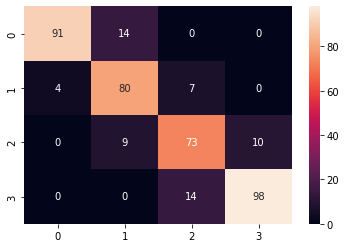

In [117]:
#best feature for desiciontreeclassfication

X_train_de = X_train.iloc[:,index_best]
X_test_de = X_test.iloc[:,index_best]

model_de =  DecisionTreeClassifier()
model_de.fit(X_train_de, y_train)
y_pred = model_de.predict(X_test_de)


print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [118]:
#best feature for RandomForrestclassfication
best_table(table_rf)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(0, 11, 12, 13, 15)","[0.921875, 0.928125, 0.90625, 0.909375, 0.89375]",0.911875,"(battery_power, px_height, px_width, ram, sc_w)",0.015535,0.012087,0.006043


In [119]:
index_best_rf = [best_table(table_rf)['feature_idx'].values[0][i] for i in range(len(best_table(table_rf)['feature_idx'].values[0]))]
index_best_rf

[0, 11, 12, 13, 15]

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       105
           1       0.86      0.96      0.91        91
           2       0.87      0.86      0.86        92
           3       0.96      0.91      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



<AxesSubplot:>

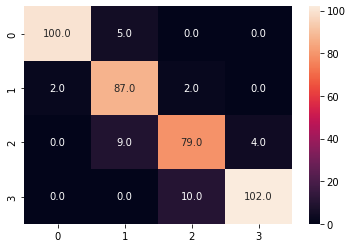

In [120]:
#best feature for RandomForrestclassfication
X_train_rf = X_train.iloc[:,index_best_rf]
X_test_rf = X_test.iloc[:,index_best_rf]

model_rf = RandomForestClassifier()
model_rf.fit(X_train_rf, y_train)
y_pred = model_rf.predict(X_test_rf )
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f')

In [121]:
#best feature for catboots
best_table(table_cat)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 8, 11, 12, 13, 16)","[0.95, 0.95, 0.94375, 0.928125, 0.95625]",0.945625,"(battery_power, blue, mobile_wt, px_height, px...",0.012341,0.009601,0.004801


In [122]:
index_best_cat = [best_table(table_cat)['feature_idx'].values[0][i] for i in range(len(best_table(table_cat)['feature_idx'].values[0]))]
index_best_cat

[0, 1, 8, 11, 12, 13, 16]

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.93      0.98      0.95        91
           2       0.92      0.89      0.91        92
           3       0.95      0.95      0.95       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



<AxesSubplot:>

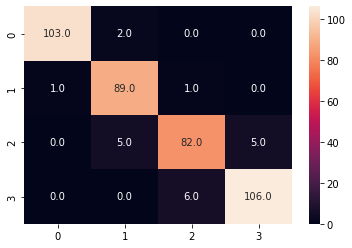

In [123]:
#best feature for catboots
X_train_cat = X_train.iloc[:,index_best_cat]
X_test_cat = X_test.iloc[:,index_best_cat]

model_cat = CatBoostClassifier(iterations=2000, silent=True)
model_cat.fit(X_train_cat, y_train)
y_pred = model_cat.predict(X_test_cat)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f')

In [124]:
#best feature for LGBM
best_table(table_lgbm)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 5, 10, 11, 12, 13, 15, 16, 19)","[0.9125, 0.925, 0.91875, 0.9125, 0.9125]",0.91625,"(battery_power, four_g, pc, px_height, px_widt...",0.006426,0.005,0.0025


In [125]:
index_best_lgbm = [best_table(table_lgbm)['feature_idx'].values[0][i] for i in range(len(best_table(table_lgbm)['feature_idx'].values[0]))]
index_best_lgbm

[0, 5, 10, 11, 12, 13, 15, 16, 19]

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       105
           1       0.90      0.97      0.93        91
           2       0.90      0.89      0.90        92
           3       0.95      0.93      0.94       112

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.94      0.94      0.94       400



<AxesSubplot:>

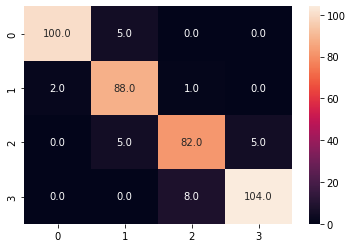

In [126]:
X_train_lgbm = X_train.iloc[:,index_best_lgbm]
X_test_lgbm = X_test.iloc[:,index_best_lgbm]

model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train_lgbm, y_train)
y_pred = model_lgbm.predict(X_test_lgbm)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f')

In [127]:
#best feature for XGboots
best_table(table_xg)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 3, 4, 8, 11, 12, 13, 15, 16, 18)","[0.91875, 0.928125, 0.915625, 0.9125, 0.91875]",0.91875,"(battery_power, dual_sim, fc, mobile_wt, px_he...",0.006721,0.005229,0.002615


In [128]:
index_best_xg = [best_table(table_xg)['feature_idx'].values[0][i] for i in range(len(best_table(table_xg)['feature_idx'].values[0]))]
index_best_xg

[0, 3, 4, 8, 11, 12, 13, 15, 16, 18]

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.87      0.93      0.90        91
           2       0.85      0.87      0.86        92
           3       0.95      0.88      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



<AxesSubplot:>

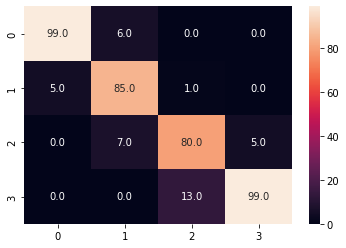

In [129]:
#best feature for XGboots
X_train_xg = X_train.iloc[:,index_best_xg]
X_test_xg = X_test.iloc[:,index_best_xg]

model_xg = XGBClassifier()
model_xg.fit(X_train_xg, y_train)
y_pred = model_xg.predict(X_test_xg)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f')

# Feature importance from model

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.88      0.97      0.92        91
           2       0.92      0.86      0.89        92
           3       0.95      0.94      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



<AxesSubplot:>

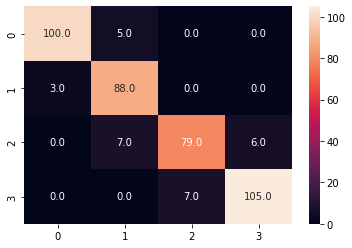

In [130]:
# catboots with out feature selection
model = CatBoostClassifier(iterations=2000, silent=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f')

In [131]:
feature = model.feature_importances_
df_feature = pd.DataFrame({'Feature': X_train.columns, "Importance": feature})
df_feature.sort_values(by='Importance', ascending=False, inplace=True)

In [132]:
df_feature

,Feature,Importance
13,ram,54.377494
0,battery_power,15.254699
11,px_height,7.932521
12,px_width,7.814717
8,mobile_wt,2.702612
6,int_memory,1.643045
16,talk_time,1.381846
14,sc_h,1.212659
15,sc_w,1.185936
7,m_dep,1.142862


<AxesSubplot:xlabel='Feature', ylabel='Importance'>

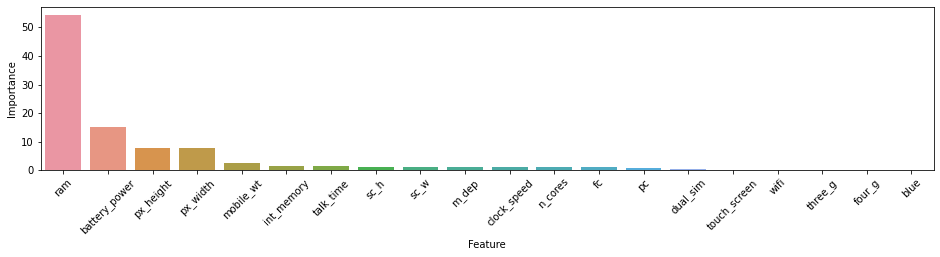

In [133]:
plt.figure(figsize=(16,3))
plt.xticks(rotation=45)
sns.barplot(x='Feature', y='Importance', data=df_feature)

In [134]:
#select feature
df_feature_select  = df_feature.loc[(df_feature['Importance']>=1)]
df_feature_select

,Feature,Importance
13,ram,54.377494
0,battery_power,15.254699
11,px_height,7.932521
12,px_width,7.814717
8,mobile_wt,2.702612
6,int_memory,1.643045
16,talk_time,1.381846
14,sc_h,1.212659
15,sc_w,1.185936
7,m_dep,1.142862


In [135]:
df_feature_select.index

Int64Index([13, 0, 11, 12, 8, 6, 16, 14, 15, 7, 2, 9], dtype='int64')

In [136]:
idx = [df_feature_select.index[i] for i in range(len(df_feature_select.index))]
idx

[13, 0, 11, 12, 8, 6, 16, 14, 15, 7, 2, 9]

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       105
           1       0.91      0.98      0.94        91
           2       0.93      0.88      0.91        92
           3       0.95      0.95      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



<AxesSubplot:>

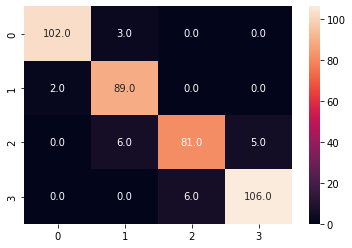

In [137]:
# catboots with feature selection from  model
X_train_select = X_train.iloc[:,idx]
X_test_select = X_test.iloc[:,idx]

model  = CatBoostClassifier(iterations=2000, silent=True)
model.fit(X_train_select,y_train)

y_pred = model.predict(X_test_select)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f')